<a href="https://colab.research.google.com/github/scarioscia/modeling_biological_populations/blob/main/Exponential_and_Logistic_Growth_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Exponential Growth**

Exponential Growth is a simple model of population growth that will be foundational to the more elaborate models we will study in the rest of this course. 


##**Derivation of the Model**
---
To derive the model: we start with a population of size $N$ at time $t$. How will the size of the population change with time? We can find the average contribution of a single individual to the population size per unit of time. Multiplying this value (the *per capita* growth rate) by the current population size will give us the change in population size per unit of time.

How do find the growth rate? We can average together the rate at which individuals are born; we call this the *per capita* birth rate $b$. Likewise, we can call the average *per capita* death rate $d$. 

The *per capita* growth rate ($r$) will therefore be: 

\begin{align}
r = b - d
\end{align}

Our variables are therefore: 


\begin{align}
N &- \text{population size} \\
t &- \text{time} \\
r &- per\: capita\: \text{birth rate} \\
\end{align}

<br>We can express the rate of change in population size as follows: 

\begin{align}
\frac{\mathrm{d}N(t)}{\mathrm{d}t} = rN(t) \\
\end{align}

<br>To find the equation for population size as a function of time, we separate variables and take the integral. 

\begin{align}
\frac{\mathrm{d}N(t)}{\mathrm{d}t} &= rN(t) \\[1em]
\frac{\mathrm{d}N(t)}{N(t)} &= r\,\mathrm{d}t \\[1em]
\int_{t_0}^t\frac{\mathrm{d}N(t)}{N(t)}&= \int_{t_0}^tr\,\mathrm{d}t \\[1em]
\end{align}

<br>Solving this integral gives us the formula for exponential growth: 

\begin{align}
N(t) = N(t_0)\;e^{r(t-t_0)}
\end{align}

## Exponential Growth in Discrete Time

The above equation is in continuous time – i.e. time is represented as a variable $t$ which can take on any non-negative value. Continuous time models are incredibly useful, but we often find it easier to work with models that represent time as a discrete set of integers. That is to say, $t$ can only take on values of $0, 1, 2, ...$, with individual values of $t$ representing a given time increment (e.g. one year, one generation, etc.) What makes discrete time models appealing? A couple things:

* As the populations we model become more complex, so do the equations describing how they change. Very often, we will be able to come up with an equation for how populations change over a time increment, but actually integrating these equations will often be impractically hard.
* We will soon want to start incorporating random effects into our models. This is easier with discrete models. 
* Discrete models work nicely with the logic of programming (think about loops, for example). Population simulation software almost always relies on discrete time. 

Formulating the discrete model is indeed more simple. All we need is an equation for how your population size changes from time $t$ to the next time point, $t+1$. As we established in the continuous model, the change in population size is the product of the *per capita* growth rate and the population size. 

\begin{align}
\text{change in N from  } t \text{  to  } t+1 \text{:  }  r\;N(t)
\end{align}

From this, we can develop the formula for the population size at the next generation: 

\begin{align}
N(t+1) &= N(t) + r\;N(t) \\[1em]
N(t+1) &= N(t)\;(1+r)
\end{align}

<br> The quantity $(1+r)$ is called the geometric growth rate, and is commonly referred to as $\lambda$, giving us the final form of our growth function: 

\begin{align}
N(t+1) &= N(t) + r\;N(t) \\[1em]
N(t+1) &= \lambda\,N(t)
\end{align}

# In-Class Exercise



## Exponential Growth Implementation

Now that we have a concise formula for exponential growth in discrete time, we would like to actually implement it in Python. First, we want to define the relevant parameters:

In [ ]:
# Defining variables
N = 50                # Initial Population Size 
L = 1.2               # Geometric growth rate
N_generations = 50    # How many time points do we want to simulate?

Our simulation will step through 50 generations. In every generation, we will update the population size (N) based on the geometric growth rate (L). As we change the value of N, we want to keep track of population size at every time point. How can we store a bunch of numbers together, keeping them in order? A **list** is a convenient way to do so: 

In [ ]:
# A list that keeps track of our population size at every generation
pop_sizes_list = [N]

Our list already contains one element – the starting population size (N). 

In every generation, we want to calculate population size using the following equation: $N(t+1) = \lambda\,N(t)$. In Python, we can express this using the following bit of code: `N = L * N`.

Because we want our simulation to run for 50 generations, we need to execute that line of code 50 times. A convenient way to do so is to use a **for loop**, as such: 

In [ ]:
for i in range(50 - 1):
  N = L * N 

To break down the firs line of this statement: we creating a temporary variable called `i`, which will take on different values as we execute our for loop. Which values will `i` take on? We specify this by telling Python that we are looping through `range(50 - 1)`, or the set of integers $0,1,2,...,48$. Note that we only want to calculate a new population size 49 times – our list already has the size of the first population. 

Note that in the body of our for loop we don't ever actually use `i`. The specific values of `i` therefore don't matter in this for loop. We just care that we iterate through an object of length 49 so that a new population size is calculated 49 times. 

One last thing we need to do: we have defined out list of population sizes, `pop_sizes_list`, but we currently don't ever add to it. To update this list with every population, we add the following line of code to our for loop: 

In [ ]:
for i in range(50 - 1):
  N = L * N 
  pop_sizes_list.append(N)

Now, every time that we update our population size, we store that value in our list. Putting it all together:

In [ ]:
# Defining variables
N = 50                # Initial Population Size 
L = 1.2               # Geometric growth rate
N_generations = 50    # How many time points do we want to simulate?

# A list that keeps track of our population size at every generation
pop_sizes_list = [N]

for i in range(50 - 1):
  N = L * N 
  pop_sizes_list.append(N)

## Plotting

Now that we know our population size, it would be great to see a plot of our population. Python has a lot of pre-made functions, but it is not ideal for plotting out of the box. Fortunately, we can use external functions that are not a part of the default Python language by using **libraries**. 

A library is a set of files containing Python code that allow you to use functions that are not a part of the language by default. `Matplotlib` is a popular Python plotting library which we will make use of throughout the course. To use `Matplotlib`, we have to import it: 

In [ ]:
import matplotlib.pyplot as plt

Let's take a closer look at that statement. In the first part of the statement, `import matplotlib.pyplot`, we are telling Python that we want to import a library called `matplotlib.pyplot`. If we just wrote `import matplotlib.pyplot`, it would work just fine, and then to use a `matplotlib` function, we would write out `matplotlib.pyplot.<function_name>`. This is a bit wordy, so we tell Python to import the library `as plt`. Now, to use a matplotlib function, we can write `plt` in place of `matplotlib.pyplot`. I.e. we would type `plt.function_name>` to use a matplotlib function.

Text(0, 0.5, 'Population Size')

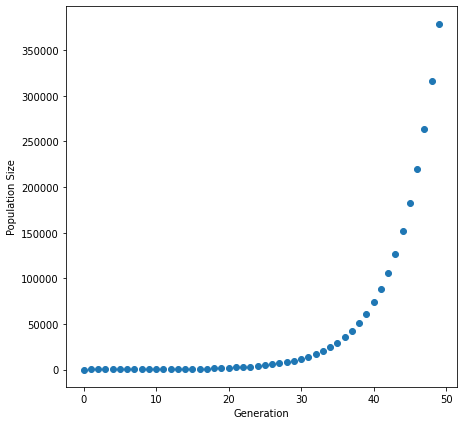

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(range(50), pop_sizes_list)
plt.xlabel('Generation')
plt.ylabel('Population Size')

For now, we aren't going to go too deep into how plotting works. Suffice to say that the first line creates an empty canvas on which we will plot. The second line plots a set of points. The `scatter()` function takes two arguments, which are the x and y-values of our points respectively. The last two lines give our figure x and y axis labels.

## Comparison to Real Data

Do real populations look like our data? We can compare to real population growth data. I've taken data from the paper *Predicting microbial growth in a mixed culture from growth curve data* (Yoav et al, 2019, *PNAS*), where microbial growth is tracked. Plotting the growth of a few representative colonies:

In [ ]:
times=[0,836.8,1676.5,2513.2,3350,4186.7,5023.5,5860.2,6697,7533.8,8370.5,9207.3,10044,10880.8,11717.5,12554.3,13391,14227.8,15064.6,15901.7,16738.1,17574.8,18411.6,19248.4,20085.1,20921.9,21758.6,22595.4,23432.2,24268.9,25105.7,25945.6,26782.4,27619.1,28455.9,29292.6,30129.4,30966.1,31802.9,32639.7,33476.4,34313.2,35149.9,35986.7,36823.5,37660.2,38497,39333.7,40170.5,41007.2,41844,42680.8,43517.5,44354.3,45191,46027.8,46864.5,47701.3,48538,49374.8,50211.6,51048.3,51885.1,52721.8,53558.6,54395.3,55232.1,56068.9,56905.6,57745.6,58582.2,59419,60255.7,61092.5,61929.2,62766,63602.7,64439.5,65276.2,66113.4,66949.8,67786.5,68623.3,69460,70296.8,71133.5,71970.3,72807,73643.8]
pop=[0.109999999,0.109899998,0.1105,0.1105,0.111599997,0.112400003,0.114299998,0.116300002,0.119999997,0.123099998,0.126800001,0.131999999,0.137700006,0.146300003,0.154499993,0.165000007,0.175099999,0.189899996,0.203700006,0.215399995,0.230000004,0.242500007,0.25909999,0.276800007,0.294099987,0.312099993,0.332700014,0.352600008,0.374799997,0.395500004,0.412200004,0.424499989,0.440299988,0.454600006,0.468800008,0.4815,0.493699998,0.504800022,0.515100002,0.524900019,0.533999979,0.542999983,0.549499989,0.5546,0.56279999,0.573800027,0.579299986,0.582899988,0.585500002,0.589299977,0.593500018,0.59890002,0.607800007,0.615100026,0.617799997,0.618700027,0.619099975,0.618700027,0.618600011,0.617600024,0.61619997,0.61559999,0.613799989,0.612399995,0.611400008,0.610000014,0.60799998,0.606999993,0.605300009,0.603100002,0.601700008,0.599900007,0.598699987,0.597000003,0.595700026,0.594099998,0.592499971,0.591199994,0.58950001,0.588100016,0.586799979,0.585399985,0.584100008,0.582899988,0.581700027,0.58039999,0.578800023,0.577600002,0.576399982]
pop2=[0.107699998,0.107000001,0.106899999,0.105700001,0.106299996,0.106700003,0.108900003,0.110699996,0.113600001,0.116700001,0.1206,0.125200003,0.130700007,0.138500005,0.145699993,0.156200007,0.170200005,0.178499997,0.190799996,0.201700002,0.216600001,0.228200004,0.243900001,0.25940001,0.27669999,0.293199986,0.310000002,0.330000013,0.350100011,0.371699989,0.388300002,0.400400013,0.417199999,0.433999985,0.449600011,0.46509999,0.480100006,0.495299995,0.511300027,0.524299979,0.53549999,0.546199977,0.556500018,0.570800006,0.580900013,0.587499976,0.594900012,0.602800012,0.611800015,0.618700027,0.628899992,0.628199995,0.627200007,0.628300011,0.628300011,0.627699971,0.627099991,0.62650001,0.625400007,0.62440002,0.623399973,0.622300029,0.623300016,0.619700015,0.618300021,0.617200017,0.615999997,0.614799976,0.613799989,0.612200022,0.610199988,0.611999989,0.610199988,0.60619998,0.604799986,0.602699995,0.601999998,0.601300001,0.59890002,0.597800016,0.596499979,0.595799983,0.594600022,0.593500018,0.592800021,0.591400027,0.58920002,0.58859998,0.587599993]
pop3=[0.114500001,0.114399999,0.113899998,0.113899998,0.114500001,0.116599999,0.116400003,0.117700003,0.119999997,0.1303,0.125499994,0.130700007,0.134399995,0.145899996,0.147200003,0.155399993,0.164800003,0.175600007,0.187399998,0.199000001,0.213200003,0.225400001,0.239399999,0.255800009,0.274300009,0.292400002,0.312299997,0.335399985,0.359200001,0.38440001,0.403600007,0.420399994,0.438899994,0.454600006,0.469399989,0.484400004,0.49970001,0.514199972,0.528800011,0.539799988,0.550100029,0.561200023,0.577300012,0.591099977,0.597500026,0.602500021,0.610899985,0.621599972,0.626999974,0.628899992,0.630299985,0.631900012,0.631799996,0.631900012,0.632300019,0.631699979,0.631399989,0.629800022,0.629199982,0.627200007,0.626999974,0.62620002,0.624899983,0.624100029,0.621599972,0.620800018,0.619499981,0.618399978,0.616599977,0.61559999,0.614199996,0.613099992,0.611500025,0.610400021,0.608699977,0.607299984,0.606100023,0.606000006,0.604099989,0.603399992,0.602100015,0.601300001,0.600499988,0.599600017,0.598800004,0.597899973,0.595899999,0.595499992,0.594600022]
pop4=[0.1074,0.106399998,0.105999999,0.107000001,0.108199999,0.109399997,0.111699998,0.116700001,0.122100003,0.123899996,0.132799998,0.141599998,0.152099997,0.162200004,0.174899995,0.186000004,0.201700002,0.217899993,0.233799994,0.251300007,0.264600009,0.279700011,0.300599992,0.317400008,0.336699992,0.356000006,0.375499994,0.389200002,0.4014,0.412699997,0.424800009,0.433600008,0.442299992,0.451200008,0.461400002,0.471799999,0.482499987,0.492399991,0.502399981,0.510500014,0.517400026,0.525300026,0.532100022,0.539799988,0.549000025,0.557699978,0.565199971,0.569700003,0.576799989,0.581099987,0.583199978,0.586000025,0.587800026,0.58859998,0.589399993,0.588699996,0.588500023,0.587599993,0.586600006,0.586199999,0.584599972,0.583400011,0.582499981,0.580500007,0.579400003,0.577799976,0.576399982,0.575200021,0.573499978,0.572300017,0.570500016,0.568499982,0.566900015,0.565100014,0.563799977,0.56190002,0.560800016,0.558899999,0.557500005,0.555499971,0.55400002,0.552600026,0.551199973,0.549899995,0.548200011,0.546700001,0.544700027,0.54369998,0.542599976]

Text(0, 0.5, 'Population Size')

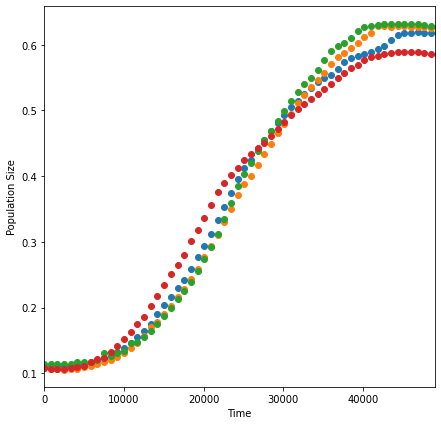

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(times, pop)
plt.scatter(times, pop2)
plt.scatter(times, pop3)
plt.scatter(times, pop4)
ax.set_xlim(0,49000)
plt.xlabel('Time')
plt.ylabel('Population Size')

Past a certain point, this does not look exponential. Indeed, we can fit an exponential function to this data (the code here is a little beyond the scope of our class, but do note the plots that are generated here):

Text(0, 0.5, 'Population Size')

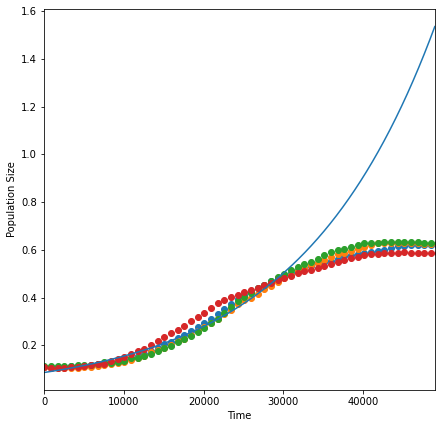

In [ ]:
import numpy as np
curve=np.polyfit(times[1:40], np.log(pop[1:40]), 1)

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(times, pop)
plt.scatter(times, pop2)
plt.scatter(times, pop3)
plt.scatter(times, pop4)
plt.plot(range(49000), [np.exp(curve[1]) * np.exp(curve[0]*t) for t in range(49000)])
ax.set_xlim(0,49000)
plt.xlabel('Time')
plt.ylabel('Population Size')

We can really see the discrepancy when we plot on a log scale: 

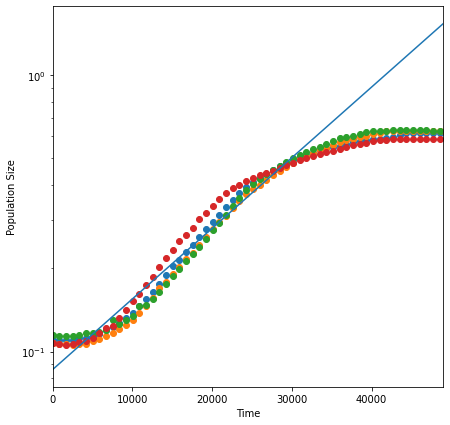

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(times, pop)
plt.scatter(times, pop2)
plt.scatter(times, pop3)
plt.scatter(times, pop4)
plt.plot(range(49000), [np.exp(curve[1]) * np.exp(curve[0]*t) for t in range(49000)])
ax.set_xlim(0,49000)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.yscale("log")

It's clear that while the exponential model predicts infinite growth forever, real biology doesn't always reflect this. We need to develop a model that reflects that in a given environment, there is a maximum population size that can be supported (called the **carrying capacity**). 

# Basic Assignment: The Logistic Growth Model

The logistic growth model is built upon the assumption that $b$ and $d$ are dependent on the current population size. That is to say, the larger the population, the higher the $per capita$ death rate and the lower the $per capita$ growth rate. In fact, we can take the equation for the rate of change that gave us the exponential ($\frac{\mathrm{d}N(t)}{\mathrm{d}t} = (b-d)N(t)$) and scale $b$ and $b$ by the population size multiplied by a constant $c$, giving us: $\frac{\mathrm{d}N(t)}{\mathrm{d}t} = ((b-c\, N(t)) - (d + c\, N(t))\;N(t)$. Integrating this equation gives us the logistic equation, though this is a bit more challenging an integral. 

The discrete form of the logistic is built upon a similar logic: 

\begin{align}
N(t+1) = \lambda \; (1 - \frac{N}{K}) \; N
\end{align}

with $K$ as the carrying capacity, or maximum possible population size. Here, we've added the term $(1 - \frac{N}{K})$, which takes on the value of 0 when the population is at the carrying capacity $K$ and is 1 when the population is at 0. That is to say, when your population is small, it behave more like the exponential.

###**Exercises**: <br>
**1.** Similar to how we implemented the exponential model, write a Python script to simulate the logistic growth model. Simulate for at least 50 generations, with starting population size and carrying capacity of your choice. For $\lambda$, pick a value between 0 and 3. <br>
**2.** Create a scatter plot of population size vs. generation using data from your model. <br>
**3.** As it turns out, the logistic function can have incredibly interesting behaviors at different values of $\lambda$. Run your logistic model for at least one $\lambda$ value in the following parameters:
* 0 < $\lambda$ < 1
* 1 < $\lambda$ < 3
* 3 < $\lambda$ < 3.5
* 3.6 < $\lambda$ ≤ 4.0

You will see some pretty complicated behaviors here – to my eye, line plots will be easier to interpret here than scatter plots. To make a line plot, use `plt.plot()` rather than `plt.scatter()`. Also remember that large chunks of code can be run in a `for` loop – a potential setup for your solution is:

```
for growth_rate in [...]:
  <calculate population size>
  <make a plot>
```

Please comment on how your populations behave in each of these ranges of $\lambda$ values. How are they different? How are they similar?

The bizarre behaviors of logistic models at higher (3.6 to 4.0) $\lambda$ values lets us take this simple model and use it to model incredibly complicated population dynamics. A particularly interesting feature in this range of $\lambda$ values is that slight deviations in $\lambda$, starting population size, or carrying capacity can generate radically different population trajectories. To what extent is this a desired behavior for a population model? The math behind these behaviors is challenging and beyond the scope of this course, but in one of our advanced exercises, we will look into these behaviors more. 

**Solution**:

1.

In [ ]:
# Defining variables
N = 10                # Initial Population Size 
L = 1.2               # Geometric growth rate
N_generations = 50    # How many time points do we want to simulate?
K = 1000               # Carrying Capacity

# A list that keeps track of our population size at every generation
pop_sizes_list = [N]

for i in range(50 - 1):
  N = L * (1-N/K) * N 
  pop_sizes_list.append(N)

2.

Text(0, 0.5, 'Population Size')

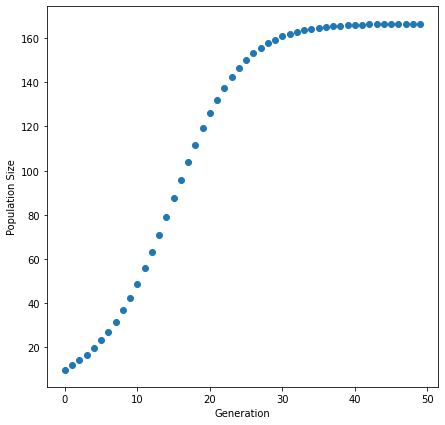

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(range(50), pop_sizes_list)
plt.xlabel('Generation')
plt.ylabel('Population Size')

3.

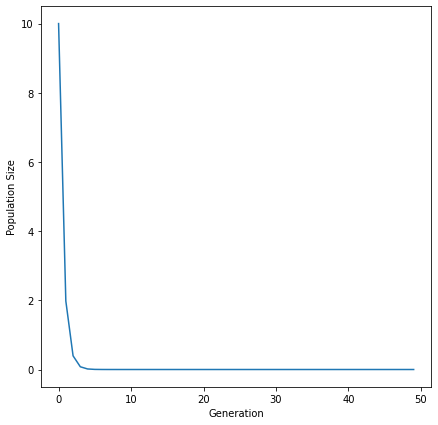

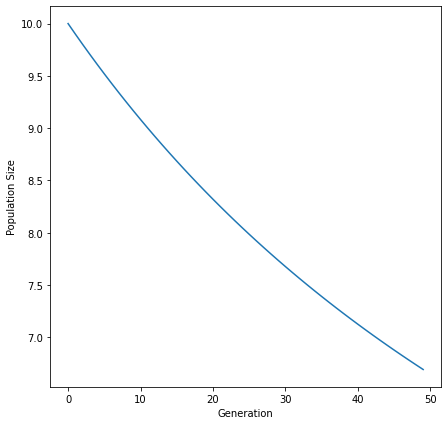

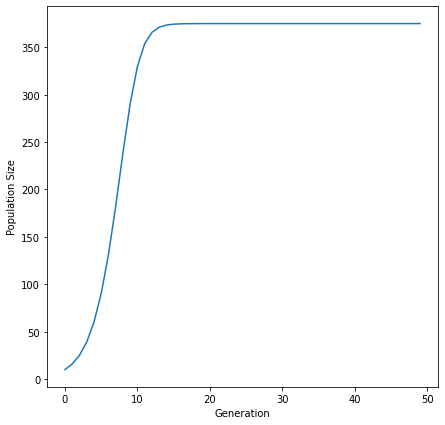

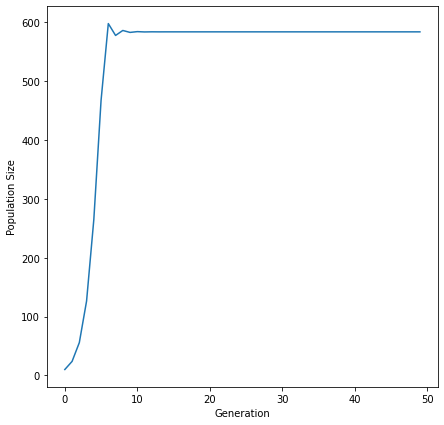

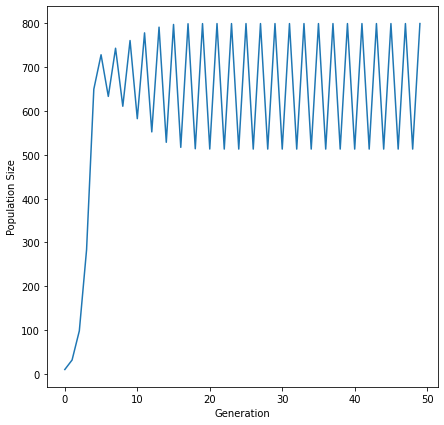

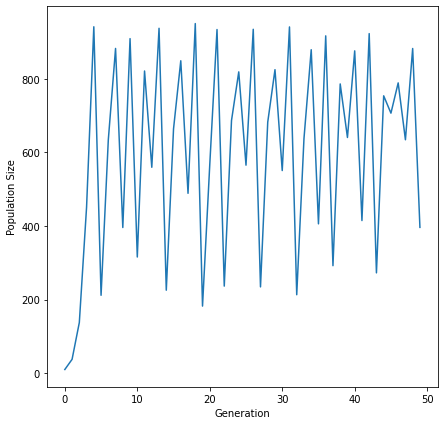

In [ ]:
for L in [0.2, 1, 1.6, 2.4, 3.2, 3.8]:
  # Defining variables
  N = 10                # Initial Population Size 
  N_generations = 50    # How many time points do we want to simulate?
  K = 1000               # Carrying Capacity

  # A list that keeps track of our population size at every generation
  pop_sizes_list = [N]

  for i in range(50 - 1):
    N = L * (1-N/K) * N 
    pop_sizes_list.append(N)

  fig, ax = plt.subplots(figsize=(7,7))
  plt.plot(range(50), pop_sizes_list)
  plt.xlabel('Generation')
  plt.ylabel('Population Size')

# Advanced Exercise: The Stable Age Distribution

Let's return to the exponential distribution for this exercise. We modeled a population as being homogenous, whereas in reality populations have multiple different types of individuals. Consider for example a population of plants, where a given plant can be either a seed or growing plant. It often doesn't really make sense to model these kinds of populations as a single group with a single average birth and death rate. 

Imagine that we have a population with 0 year olds and 1 year olds. We can represent the population size as:

\begin{align}
N &- \text{Total population size} \\
N_0 &- \text{Number of 0 year olds} \\
N_1 &- \text{Number of 1 year olds} \\
\end{align}

Now, for each group, we can define the average number of offspring produced as:

\begin{align}
m_0 &- \text{Avg. number of offspring produced by a 0 year old} \\
m_1 &- \text{Avg. number of offspring produced by a 1 year old} \\
\end{align}

And lastly, we can define the number of individuals that progress to the next developmental stage as: 

\begin{align}
S_0 &- \text{Survival rate of 0 year olds} \\
0 &- \text{Survival rate of 1 year olds} \\
\end{align}

This reflects that a fraction of 0 year olds survive to year 1, and no 1 year olds survive to year 2. In the space below, define variables for all of the above quantities:

In [ ]:
n0 = 2
n1 = 10

m0 = 1
m1 = 1

S0 = 0.9

n_gens = 50

Now let's use these variables to descripe population changes. At a given generation, how many offspring will be produced? 

The 0 year olds will produce $N_0*m_0$ offspring. The 1 year olds will produce $N_1*m_1$ offspring. Combining these, we can find the number of 0 year olds in the next generation: $N_0(t+1) = N_0*m_0 + N_1*m_1$ 

How many 1 year olds will there be? The only way there can be a 1 year old is if a 0 year old survives. Therefore, $N_1(t+1) = N_0 * S_0$. 

Together, the following formulae describe the change in population size:

\begin{align}
N_0(t+1) &= N_0*m_0 + N_1*m_1 \\[1em]
N_1(t+1) &= N_0 * S_0
\end{align}

<br>Now, implement this model for at least 50 generations in Python. Produce a plot where you plot the number of 0 and 1 years. 

To plot two sets of scattered points in matplotlib, simply use the `plt.scatter()` function twice.

In [ ]:
n0_list = [n0]
n1_list = [n1]
ratio_list = [n0/n1]
total_pop_size_list = [n0 + n1]

for i in range(n_gens):
  n0_next_gen = n0*m0 + n1*m1
  n1_next_gen = n0*S0

  n0 = n0_next_gen
  n1 = n1_next_gen

  n0_list.append(n0)
  n1_list.append(n1)
  ratio_list.append(n0/n1)
  total_pop_size_list.append(n0 + n1)

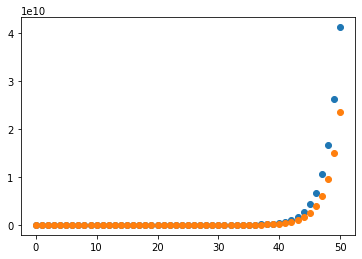

In [ ]:
fig, ax = plt.subplots()
plt.scatter(range(n_gens + 1), n0_list)
plt.scatter(range(n_gens + 1), n1_list)

The most interesting behavior of this model is in the ratio of 0 to 1 year olds. Modify your function above to keep track of this ratio and plot it below: 

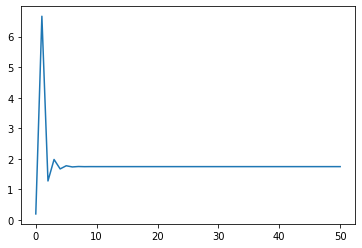

In [ ]:
fig, ax = plt.subplots()
plt.plot(range(n_gens + 1), ratio_list)

You can see that as this population grows, the ratio of 0 to 1 year olds stabilizes!

# Advanced Exercise: The Stable Age Distribution

You have plotted the exponential model for a population with two age stages. Can you derive the equations for a population with more than two age groups? Try a population with 3 stages. 

Can you write a script that simulates an arbitrary number of populations?  

In [ ]:
n0 = 2
n1 = 10
n2 = 5

m0 = 1
m1 = 1
m2 = 1

S0 = 0.9
S1 = 0.5

n_gens = 50

In [ ]:
n0_list = [n0]
n1_list = [n1]
n2_list = [n2]

total_pop_size = n0 + n1 + n2

n0_frac_list = [n0/total_pop_size]
n1_frac_list = [n1/total_pop_size]
n2_frac_list = [n2/total_pop_size]

total_pop_size_list = [total_pop_size]

for i in range(n_gens):
  n0_next_gen = n0*m0 + n1*m1 + n2*m2
  n1_next_gen = n0*S0
  n2_next_gen = n1*S1

  n0 = n0_next_gen
  n1 = n1_next_gen
  n2 = n2_next_gen

  total_pop_size = n0 + n1 + n2

  n0_list.append(n0)
  n1_list.append(n1)
  n2_list.append(n2)

  total_pop_size_list.append(total_pop_size)

  n0_frac_list.append(n0/total_pop_size)
  n1_frac_list.append(n1/total_pop_size)
  n2_frac_list.append(n2/total_pop_size)

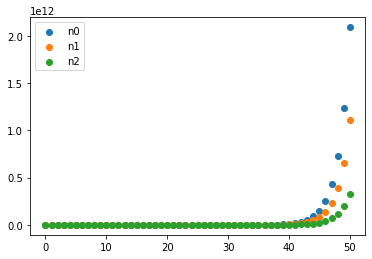

In [ ]:
fig, ax = plt.subplots()
plt.scatter(range(n_gens + 1), n0_list, label = "n0")
plt.scatter(range(n_gens + 1), n1_list, label = "n1")
plt.scatter(range(n_gens + 1), n2_list, label = "n2")
ax.legend()

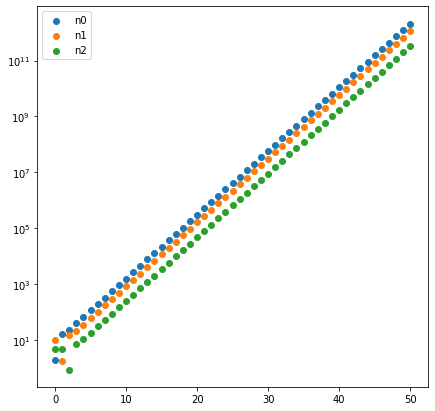

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
plt.scatter(range(n_gens + 1), n0_list, label = "n0")
plt.scatter(range(n_gens + 1), n1_list, label = "n1")
plt.scatter(range(n_gens + 1), n2_list, label = "n2")

plt.yscale("log")

ax.legend()

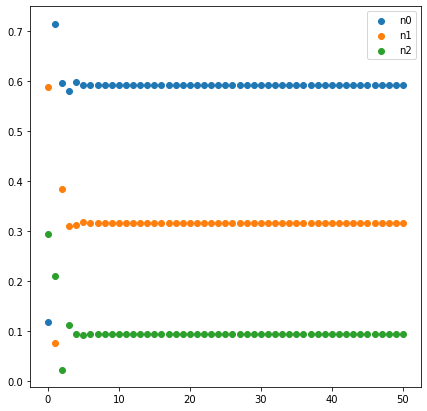

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(range(n_gens + 1), n0_frac_list, label = "n0")
plt.scatter(range(n_gens + 1), n1_frac_list, label = "n1")
plt.scatter(range(n_gens + 1), n2_frac_list, label = "n2")
ax.legend()

In [ ]:
# Random numbers in Python: 

# To use random numbers in python, first load the random module:
import random

# There are two particularly useful functions in this module:
# random.randint(a,b) generates a random integer between a and b
print(random.randint(0, 6)) # Generates a random number between 0 and 6
# random.uniform(a,b) generates a random float between a and b
print(random.uniform(0, 6)) # Generates a random number between 0 and 6

2
2.8522064432699636


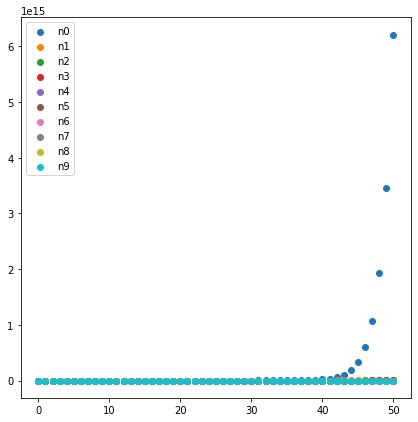

In [ ]:
import random

n_gens = 50
n_stages = 10
max_initial_pop_size = 100
max_fecundity = 6

pop_sizes = []
m_vector = []
survival_vector = []

for i in range(n_stages):
  pop_sizes.append(random.randint(0, max_initial_pop_size))
  m_vector.append(random.uniform(0, max_fecundity))
  survival_vector.append(random.uniform(0, 1))

pop_size_history = [[i] for i in pop_sizes]
total_pop_size_history = [sum(pop_sizes)]

# Last stage doesn't survive ofc
survival_vector[-1] = 0

for i in range(n_gens):
  # Calculate number of offspring: 
  n_offspring = sum([pop_sizes[i]*m_vector[i] for i in range(len(pop_sizes))])

  # Calculate survival for all pops: 
  n_surviving = [pop_sizes[i]*survival_vector[i] for i in range(len(pop_sizes))]

  # Combine the above into a 
  new_pop_sizes = [n_offspring] + n_surviving[:-1]

  # Store pop size history
  for j in range(len(new_pop_sizes)):
    pop_size_history[j].append(new_pop_sizes[j])
  
  total_pop_size_history.append(sum(new_pop_sizes))

  # Overwrite pop size
  pop_sizes = new_pop_sizes

fig, ax = plt.subplots(figsize=(7,7))
for i in range(len(pop_size_history)):
  lab_text = "n" + str(i)
  plt.scatter(range(n_gens + 1), pop_size_history[i], label = lab_text)
ax.legend()

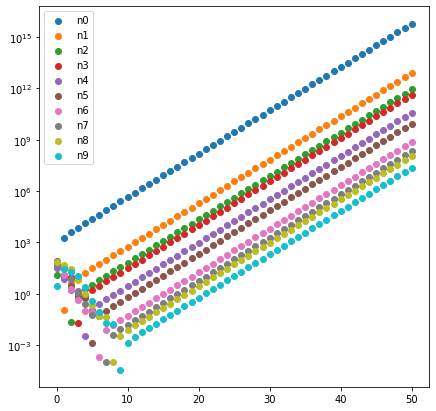

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
for i in range(len(pop_size_history)):
  lab_text = "n" + str(i)
  plt.scatter(range(n_gens + 1), pop_size_history[i], label = lab_text)
plt.yscale("log")
ax.legend()

# Advanced Exercise: The Logistic Model with Time Lag

A common interpretation of the logistic equation is that it represents the effect of limited resources on population size. In this case, it is intuitive that the effect of limited resources will not have an immediate effect on the population size. Therefore, we often like to think of the logistic curve with a time delay. 

A common way to implement this is to modify the term $(1 - \frac{N}{K})$ to consider $N(t-1)$ rather than $N$. Implement this in Python and plot. Try values of $\lambda < 2.5$ – if you go higher than this, your population will collapse to 0. 

Text(0, 0.5, 'Population Size')

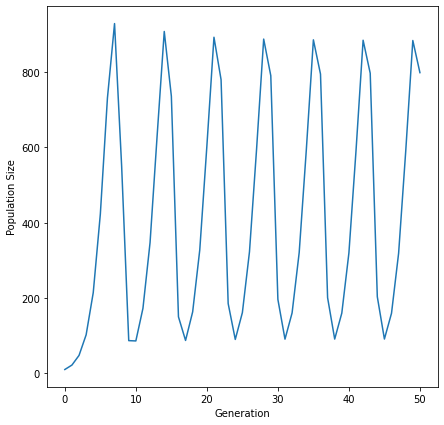

In [ ]:
# Defining variables
N = 10                # Initial Population Size 
N_generations = 50    # How many time points do we want to simulate?
K = 1000              # Carrying Capacity
L = 2.2

# A list that keeps track of our population size at every generation
pop_sizes_list = [N]

N = L * (1-N/K) * N
pop_sizes_list.append(N)  
for i in range(50 - 1):

  N = L * (1-pop_sizes_list[-2]/K) * N    
  pop_sizes_list.append(N)

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(range(51), pop_sizes_list)
plt.xlabel('Generation')
plt.ylabel('Population Size')

# Advanced Exercise: The Logistic Map

You just saw some very complex behaviors emerge at higher lambda values. Let's look at these behaviors a bit more using the logistics map. First, we can reformulate our logistic growth formula into a way that is more helpful for this purpose: 

\begin{align}
x_{t+1} = \lambda \; (1 - x_t) \; x_t
\end{align}

where $x_t$ is the current population size expressed as a fraction of the carrying capacity, or $\frac{N(t)}{K}$. 

Now, we can plot the logistic map. The logistic map is a line plot where the x axis is $x_t$ and the y axis is $x_{t+1}$. 

The logistic map has two lines: 
1. A diagonal line of $x_{t+1}$ = $x_t$
2. A curve where $x_{t+1}$ is calculated using $x_{t+1} = \lambda \; (1 - x_t) \; x_t$

The intersection of these two lines is an equilibrium. Let's start by generating a plot of the logistic map. Make plots of the logistic map at $\lambda = 2.8, 3.2, 3.8$.

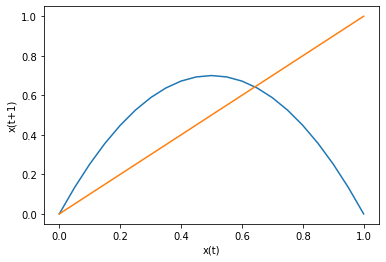

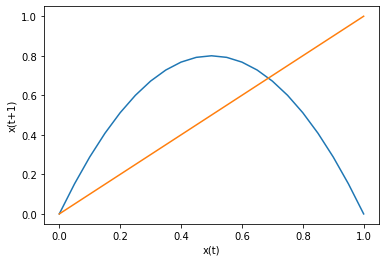

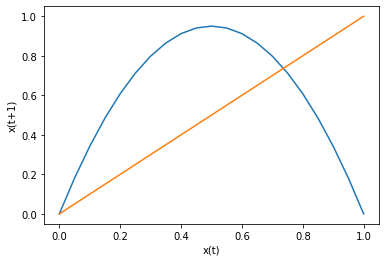

In [ ]:
for growth_rate in [2.8, 3.2, 3.8]:
  x_t_list = [x * 0.05 for x in range(0, 21)]
  x_t_plus_one_list = []
  for xt in x_t_list:
    x_t_plus_one_list.append(growth_rate * (1-xt) * xt)

  fig, ax = plt.subplots()
  plt.plot(x_t_list, x_t_plus_one_list)
  plt.plot(x_t_list, x_t_list)
  plt.xlabel('x(t)')
  plt.ylabel('x(t+1)')

All three plots look similar, with populations reaching an equilibrium size somewhere between $06-0.8$. However, we can see that there is a dramatic difference if we plot the map for $x_t$ against $x_{t+2}$. Do so below: 

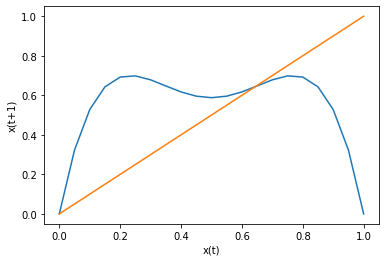

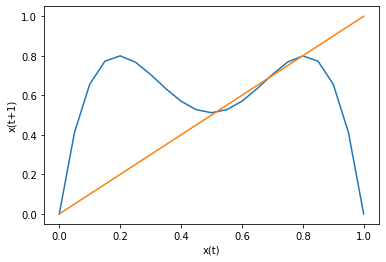

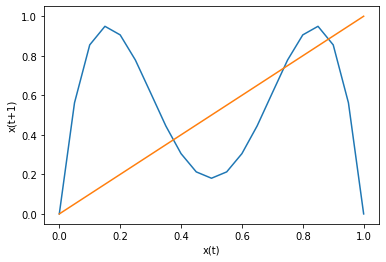

In [ ]:
for growth_rate in [2.8, 3.2, 3.8]:
  x_t_list = [x * 0.05 for x in range(0, 21)]
  x_t_plus_two_list = []
  for xt in x_t_list:
    x_t_plus_two_list.append(growth_rate* (1-(growth_rate * (1-xt) * xt)) * (growth_rate * (1-xt) * xt))

  fig, ax = plt.subplots()
  plt.plot(x_t_list, x_t_plus_two_list)
  plt.plot(x_t_list, x_t_list)
  plt.xlabel('x(t)')
  plt.ylabel('x(t+1)')

Consider the plots you get here. How do the differences in these plots explain (in part) the strange behaviors we saw at different $\lambda$ values? 

Lastly, we can use a logistic map to trace the trajectory of a population from a given starting population size.

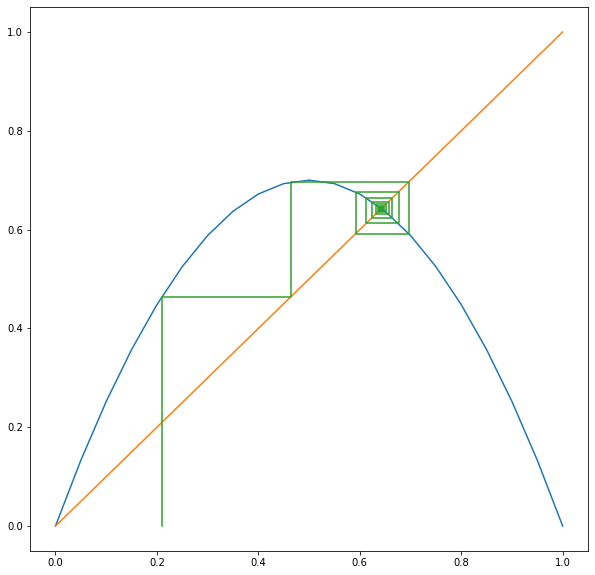

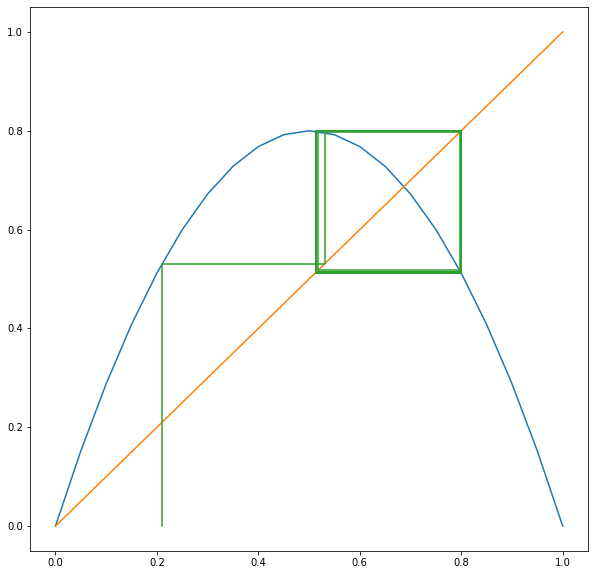

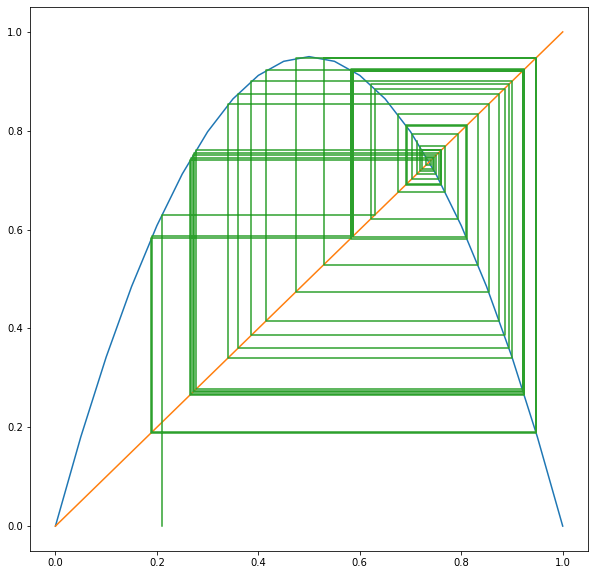

In [ ]:
for growth_rate in [2.8, 3.2, 3.8]:
  x_t_list = [x * 0.05 for x in range(0, 21)]
  x_t_plus_one_list = []
  for xt in x_t_list:
    x_t_plus_one_list.append(growth_rate * (1-xt) * xt)

  fig, ax = plt.subplots(figsize=(10, 10))

  xt = 0.21
  x = xt
  y = growth_rate * (1-xt) * xt
  x_list = [xt, xt]
  y_list = [0, y]

  for i in range(50):
    xt = growth_rate * (1-xt) * xt
    
    y = growth_rate * (1-xt) * xt

    
    # Add horizontal line
    x_list.append(xt)
    y_list.append(xt)
    
    x_list.append(xt)
    y_list.append(y)
    
    x = xt

    # Add vertical line
    x_list.append(y)
    y_list.append(y)
    
    x_list.append(y)
    y_list.append(growth_rate * (1-y) * y)

    
    
  plt.plot(x_t_list, x_t_plus_one_list)
  plt.plot(x_t_list, x_t_list)
  plt.plot(x_list, y_list)